In [1]:
# Import dependencies/ libraries
import os
import pandas as pd
import numpy as np
from path import Path
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans  
from sklearn.manifold import TSNE 

In [2]:
# Load current directory
crypto_path = os.path.join(os.getcwd(), 'Instructions', 'crypto_data.csv')

In [3]:
crypto_path

'c:\\Users\\vaab2\\OneDrive\\Desktop\\Excercises in class\\Homeworks\\20-Unsupervised-Learning\\Instructions\\crypto_data.csv'

In [4]:
# Read csv and display dataframe 
crypto_df = pd.read_csv(crypto_path)
crypto_df = crypto_df.set_index('Unnamed: 0')

crypto_df.index.name = None
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [5]:
# Display shape of dataframe
crypto_df.shape

(1252, 6)

In [6]:
# Filtering dataframe for currencies not being traded
crypto_df = crypto_df.loc[crypto_df["IsTrading"] == True]

crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [7]:
# Dropping the IsTrading column
crypto_df = crypto_df.drop(columns = "IsTrading")

crypto_df


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
# Remove rows with null
crypto_df = crypto_df.dropna()

crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
# Check NaN were dropped
crypto_df.isna().sum()

CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [10]:
# Filtering the dataframe for mined coins
crypto_df = crypto_df.loc[crypto_df["TotalCoinsMined"] > 0]

crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [11]:
# Delete CoinName column
crypto_df = crypto_df.drop(columns = "CoinName")

crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [12]:
# Determine the number of rows and columns
crypto_df.shape

(532, 4)

In [13]:
# Assign X to the dataframe
X=crypto_df

X.shape

(532, 4)

In [14]:
# Convert the Algorithm and ProofType columns to numerical data using get_dummies
X = pd.get_dummies(crypto_df, columns=["Algorithm","ProofType"])

X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Determine the number of rows and columns
X.shape

(532, 98)

In [16]:
# Standardizing the dataframe with StandarScaler
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:5])


[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

Dimensionality Reduction

In [17]:
# Applying PCA to reduce dimensions
# Initialize PCA model
pca = PCA(n_components=0.90)

pca.fit(X_scaled)
X_pca = pca.fit_transform(X_scaled)

X_pca.shape

(532, 74)

How did the number of features change?

The pca model decomposed the features (rows) from 98 to 74

In [18]:
# Converting the pca dataset to a dataframe
pca_df = pd.DataFrame(X_pca)

pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-1.540297e-14,-1.165476e-11,1.934877e-14,-0.007129,-1.319756,-0.051813,...,6.791870e-16,3.244575e-16,-1.011010e-15,-2.982695e-15,-1.731974e-15,5.284002e-15,-1.924284e-15,3.781938e-15,-4.015154e-16,2.426681e-16
1,-0.318434,1.032331,-0.591126,0.001386,-1.523083e-14,-1.155975e-11,1.954039e-14,-0.007739,-1.322514,-0.056674,...,-4.586593e-16,9.072591e-16,-2.269850e-15,-2.263852e-15,-2.660612e-15,7.651009e-15,-1.525656e-15,3.355866e-15,-5.762231e-16,5.071767e-18
2,2.305468,1.656383,-0.683617,0.004731,-1.497294e-14,-3.949449e-11,3.772165e-14,-0.054781,-1.542879,-0.943951,...,1.780031e-14,-4.989842e-14,4.825798e-14,3.187038e-14,3.098898e-14,-9.932864e-14,-3.553773e-14,-7.367435e-14,3.182511e-14,-1.967865e-14
3,-0.145184,-1.320593,0.192813,-0.001229,3.693199e-15,1.025361e-11,-8.871203e-15,-0.002071,0.281463,0.251862,...,1.280944e-15,-1.279970e-15,8.288230e-15,2.691578e-15,-4.122980e-15,-1.425553e-14,-3.198069e-15,-1.367220e-14,6.083623e-15,-1.688258e-14
4,-0.151768,-2.036192,0.396182,-0.001705,1.570991e-14,1.423168e-11,-1.220895e-14,0.027735,0.519099,0.188820,...,-6.092554e-16,1.358936e-14,7.275832e-14,-8.776375e-14,-7.938475e-14,-6.460819e-14,3.930429e-14,-7.474587e-14,1.316774e-13,-2.987009e-13


In [19]:
# Perform the tsne model
# Initialize t-SNE model
tsne = TSNE()

# Reduce dimensions
tsne_features = tsne.fit_transform(pca_df)

tsne_features.shape

(532, 2)

In [20]:

# Create the tsne DataFrame
tsne_df = pd.DataFrame(tsne_features)
tsne_df

,0,1
0,-10.713979,-14.870121
1,-8.348729,-22.179152
2,-8.865872,-29.448721
3,34.321209,8.321670
4,6.729823,14.546594
...,...,...
527,27.976860,10.658347
528,-6.441629,-19.496740
529,-13.937800,18.472790
530,-3.471839,22.135244


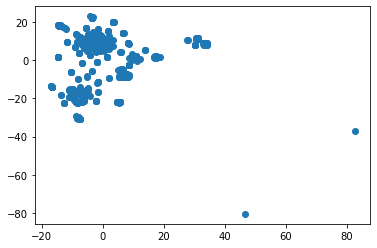

In [21]:
# Prepare to plot the dataset

# The first column of transformed features
tsne_df['x'] = tsne_features[:,0]

# The second column of transformed features
tsne_df['y'] = tsne_features[:,1]

# Visualize the clusters
plt.scatter(tsne_df['x'], tsne_df['y'])
plt.show()

Observe whether there are distinct clusters or not?

There appears to be about 4 distinct clusters with 2 outliers

Cluster Analysis with K-Means

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


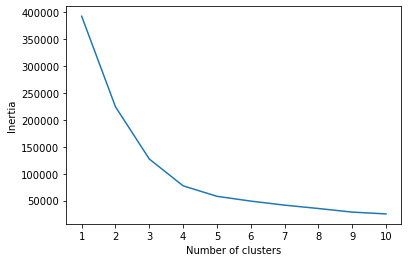

In [22]:
# Identify the best number of clusters using the elbow curve (using df from tsne reduction)
inertia = []
k = list(range(1, 11))


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Determine, if possible, where the elbow of the plot is, and at which value of k it appears.

From the elbow curve the k appears around 4 which is indicitive of 4 clusters as seen in the scatter plot

Recommendations

Based on your findings, make a brief (1-2 sentences) recommendation to your clients. Can the cryptocurrencies be clustered together? If so, into how many clusters?

Since clustering is used in Unsupervised Machine Learning to classify data into structures to make it possible for easy manipulation as well as make the data easy to understand. Clustering minimizes the variance of data point within the cluster and combine data that are like each other. The Scatter plot was a little unclear of the number of possible clusters, so the elbow curve was employed. 
The Elbow Curve is used to determine the optimal number of possible clusters. From the elbow curve the value of k=4 (the point where there is an improvement in distortion) which means further division of the data into clusters are not necessary. 
The Cryptocurrency data can therefore be clustered into 4 for analysis.  
